## Observations and Insights 

Observation 1. There were more timepoints recoreded for the Capomulin & Ramicane drug treatments indicating that more mice survived till the end on the study.

Observation 2.  It can be seen in the "Tumour Volume v Time Point (Mice Treated with Capomulin)" line graph below that there is a noticiable reduction of tumour size over time for mice treated with the Capomulin drug.  

Observation 3. The correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment is 0.84 indicating a STRONG correlation.


In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [88]:
study_results.shape

(1893, 4)

In [89]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [90]:
mouse_metadata.shape

(249, 5)

In [91]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [92]:
study_results.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [93]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [94]:
# Combine the data into a single dataset
mouse_data_merged_df= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_data_merged_df.head(3)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [95]:
# Checking datatypes
mouse_data_merged_df.dtypes

Mouse ID                object
Timepoint                int64
Tumour Volume (mm3)    float64
Metastatic Sites         int64
Drug Regimen            object
Sex                     object
Age_months               int64
Weight (g)               int64
dtype: object

In [96]:
# Checking the number of mice.
mouse_data_merged_df.count()

Mouse ID               1893
Timepoint              1893
Tumour Volume (mm3)    1893
Metastatic Sites       1893
Drug Regimen           1893
Sex                    1893
Age_months             1893
Weight (g)             1893
dtype: int64

In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test_df = mouse_data_merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_data_merged_df["Duplicated_Entry"] = test_df
mouse_data_merged_df.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
0,b128,0,45.0,0,Capomulin,Female,9,22,False
1,f932,0,45.0,0,Ketapril,Male,15,29,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False


In [98]:
duplicate_data_df = mouse_data_merged_df.loc[mouse_data_merged_df["Duplicated_Entry"] == True]
duplicate_data_df.count()

Mouse ID               5
Timepoint              5
Tumour Volume (mm3)    5
Metastatic Sites       5
Drug Regimen           5
Sex                    5
Age_months             5
Weight (g)             5
Duplicated_Entry       5
dtype: int64

### # Optional: Get all the data for the duplicate mouse ID. 

In [99]:
# groupby duplicated 5x enteries and indentify Mouse ID
duplicate_mouse_data_df = duplicate_data_df.groupby("Mouse ID")
duplicate_mouse_data_df.head(10)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [100]:
duplicate_data_df = mouse_data_merged_df.loc[mouse_data_merged_df["Mouse ID"] == "g989"]
duplicate_data_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
107,g989,0,45.000000,0,Propriva,Female,21,26,False
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,False
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,False
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,False
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,False
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_merged_df = mouse_data_merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='last')
cleaned_mouse_data_merged_df.loc[mouse_data_merged_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True
1195,g989,25,56.045564,1,Propriva,Female,21,26,False
1380,g989,30,59.082294,1,Propriva,Female,21,26,False
1592,g989,35,62.570880,2,Propriva,Female,21,26,False


In [102]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data_merged_df.count()

Mouse ID               1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Duplicated_Entry       1888
dtype: int64

# Summary Statistics
### Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
### mean, median, variance, standard deviation, and SEM of the tumour volume. 
### Assemble the resulting series into a single summary dataframe.

In [103]:
cleaned_mouse_data_merged_df.dtypes

Mouse ID                object
Timepoint                int64
Tumour Volume (mm3)    float64
Metastatic Sites         int64
Drug Regimen            object
Sex                     object
Age_months               int64
Weight (g)               int64
Duplicated_Entry          bool
dtype: object

In [104]:
gr_summary_regimen_df = cleaned_mouse_data_merged_df.groupby(["Drug Regimen"])
print(gr_summary_regimen_df)
gr_summary_regimen_df.count().head(15)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


In [105]:
gr_summary_regimen_df.dtypes

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,object,int64,float64,int64,object,int64,int64,bool
Ceftamin,object,int64,float64,int64,object,int64,int64,bool
Infubinol,object,int64,float64,int64,object,int64,int64,bool
Ketapril,object,int64,float64,int64,object,int64,int64,bool
Naftisol,object,int64,float64,int64,object,int64,int64,bool
Placebo,object,int64,float64,int64,object,int64,int64,bool
Propriva,object,int64,float64,int64,object,int64,int64,bool
Ramicane,object,int64,float64,int64,object,int64,int64,bool
Stelasyn,object,int64,float64,int64,object,int64,int64,bool


In [106]:
# create a DataFrame using groupby Drug Regimen
drug_regimen_indexed = cleaned_mouse_data_merged_df.set_index("Drug Regimen")
gr_summary_regimen_df = drug_regimen_indexed.groupby(["Drug Regimen"])

gr_summary_regimen_df.count().head(15)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


In [107]:
#Calculate the mean
regimen_mean = gr_summary_regimen_df["Tumour Volume (mm3)"].mean()
regimen_mean
#print('Mean per Drug Regimens: {:,.2F}'.format(regimen_mean))

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumour Volume (mm3), dtype: float64

In [108]:
#Calculate the median
regimen_median = gr_summary_regimen_df["Tumour Volume (mm3)"].median()
regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumour Volume (mm3), dtype: float64

In [109]:
#Calculate the variance
regimen_var = gr_summary_regimen_df["Tumour Volume (mm3)"].var()
regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumour Volume (mm3), dtype: float64

In [110]:
#Calculate the Std Dev
regimen_sd = gr_summary_regimen_df["Tumour Volume (mm3)"].std()
regimen_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumour Volume (mm3), dtype: float64

In [111]:
#Calculate the SEM
regimen_sem = gr_summary_regimen_df["Tumour Volume (mm3)"].sem()
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumour Volume (mm3), dtype: float64

In [112]:
# Create a new DataFrame using the above results
grouped_stats_data_df = pd.DataFrame({  "Mean": regimen_mean,
                                        "Median": regimen_median,
                                        "Variance": regimen_var,
                                        "Std Dev": regimen_sd,
                                        "SEM": regimen_sem})
grouped_stats_data_df.head(20)

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [113]:
#Format to 4 decimal places
#grouped_stats_data_df.style.format({'Mean':"{:,.4F}",
#                                    'Median':"{:,.4F}",
#                                     'Variance':"{:,.4F}",
#                                    'Std Dev': "{:.4F}",
#                                    'SEM': "{:.4F}"})

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
### Using the aggregation method, produce the same summary statistics in a single line

In [114]:
gr_summary_regimen_df["Tumour Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [115]:
drug_regimen_gr = gr_summary_regimen_df.count()
drug_regimen_gr.head(10)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


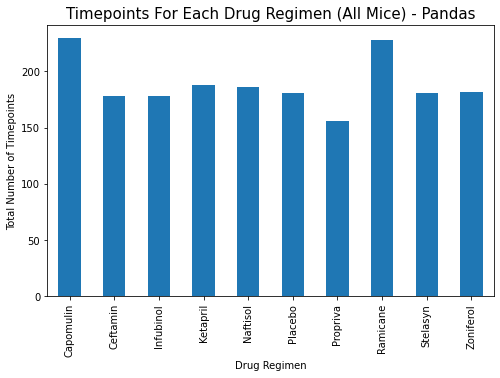

<Figure size 432x288 with 0 Axes>

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_timepoints = drug_regimen_gr[["Timepoint"]]

drug_and_timepoints.plot(kind="bar", figsize=(8, 5), legend = False)

plt.title(("Timepoints For Each Drug Regimen (All Mice) - Pandas"),fontsize=15)
plt.ylabel("Total Number of Timepoints")

plt.show()
plt.tight_layout()





<BarContainer object of 10 artists>

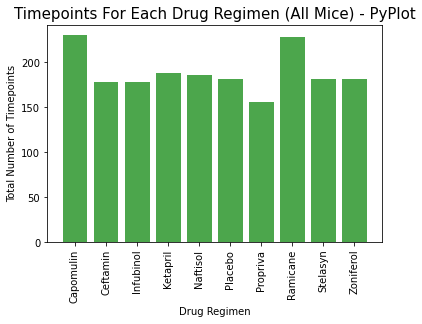

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", 
                            "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
                            , rotation='vertical')

y_axis = gr_summary_regimen_df['Timepoint'].count()

# Give our chart some labels and a tile
plt.title(("Timepoints For Each Drug Regimen (All Mice) - PyPlot"),fontsize=15)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

plt.bar(x_axis, y_axis, color='g', alpha=0.7, align="center")

###  Generate a pie plot showing the distribution of female versus male mice using Pandas

In [118]:
# groupby the master dataframe "cleaned_mouse_data_merged_df" into Sex

gr_sex_all_df = cleaned_mouse_data_merged_df.groupby(["Sex"])
gr_sex_all_df.count().head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g),Duplicated_Entry
Sex,,,,,,,,
Female,930,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958,958


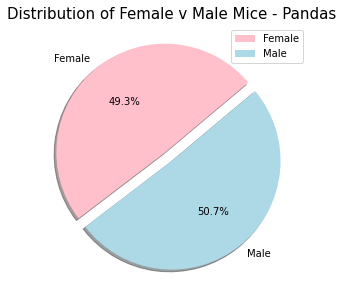

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distrubution = gr_sex_all_df.aggregate({"Sex":['count']})

plot = gender_distrubution.plot.pie(y='Sex', autopct="%.1f%%", explode = (0.1, 0), colors=["pink", "lightblue"], figsize=(5,5), shadow=True, startangle=40)

# Give our chart some labels and a tile
plt.title(("Distribution of Female v Male Mice - Pandas"),fontsize=15)
plt.xlabel("")
plt.ylabel("");

### Generate a pie plot showing the distribution of female versus male mice using pyplot

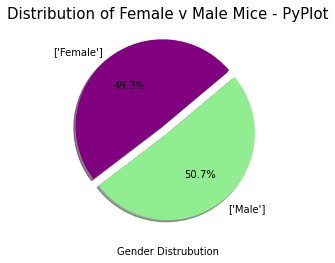

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

index_2 = gr_sex_all_df["Sex"].unique()

sex_2 = gr_sex_all_df["Mouse ID"].count()

# Automatically finds the percentages of each part of the pie chart
plt.pie(sex_2, explode=(0.1, 0), labels=index_2, colors=["purple", "lightgreen"],autopct="%1.1f%%", shadow=True, startangle=40)
plt.savefig("Gender.png")

# Give our chart some labels and a tile
plt.title(("Distribution of Female v Male Mice - PyPlot"),fontsize=15)
plt.xlabel("Gender Distrubution")
#plt.ylabel("Total Number of Timepoints")

plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_df = cleaned_mouse_data_merged_df.groupby(["Mouse ID"])
timepoint_max = mouse_id_df["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_timepoint_max_df= pd.merge(timepoint_max, cleaned_mouse_data_merged_df, on=["Mouse ID", "Timepoint"], how="left")


merged_timepoint_max_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
0,a203,45,67.973419,2,Infubinol,Female,20,23,False
1,a251,45,65.525743,1,Infubinol,Female,21,25,False
2,a262,45,70.717621,4,Placebo,Female,17,29,False
3,a275,45,62.999356,3,Ceftamin,Female,20,28,False
4,a366,30,63.440686,1,Stelasyn,Female,16,29,False
...,...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26,False
245,z578,45,30.638696,0,Ramicane,Male,11,16,False
246,z581,45,62.754451,3,Infubinol,Female,24,25,False
247,z795,45,65.741070,3,Naftisol,Female,13,29,False


In [122]:
# Create empty list to fill with tumour vol data (for plotting)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumour_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumour_vol = merged_timepoint_max_df.loc[merged_timepoint_max_df["Drug Regimen"] == drug, 'Tumour Volume (mm3)']
    
    # add subset
    final_tumour_vol.append(tumour_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumour_vol.loc[(tumour_vol < lower_bound) | (tumour_vol > upper_bound)]
    if len(outliers) > 0:
        print(f"{drug}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64


In [123]:
#final_tumour_vol

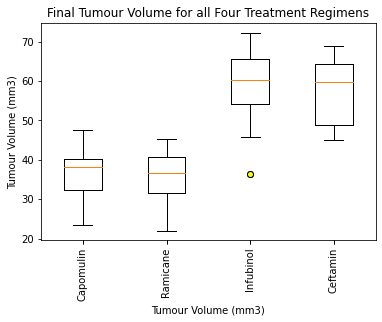

In [124]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

plt.boxplot(final_tumour_vol)
plt.title('Final Tumour Volume for all Four Treatment Regimens')
plt.xlabel('Tumour Volume (mm3)')
plt.ylabel('Tumour Volume (mm3)')
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation=90)
outlier = dict(markerfacecolor='yellow')
outlier_points = plt.boxplot(final_tumour_vol, flierprops=outlier)
    
plt.show()

## Line and Scatter Plots

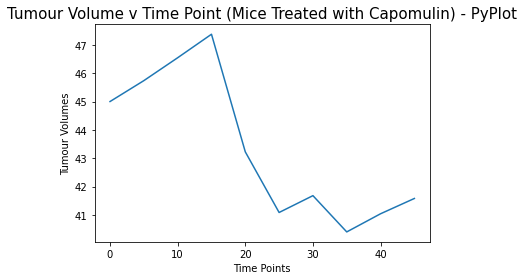

In [125]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
#r944 selected

r944_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Mouse ID"] == "r944"]
r944_data
x_axis = r944_data["Timepoint"]
tv_data = r944_data["Tumour Volume (mm3)"]

# Give our chart some labels and a tile
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.xlabel("Time Points")
plt.ylabel("Tumour Volumes")

# Plot the line
plt.plot(x_axis, tv_data)
plt.show()

In [126]:
capomulin_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Drug Regimen"] == "Capomulin"]
capomulin_data_avg = capomulin_data.groupby(["Mouse ID"]).mean() 
#capomulin_data
#capomulin_data_avg

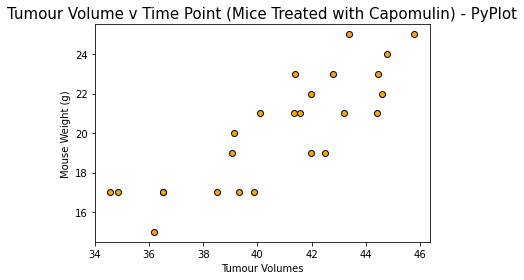

In [127]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

#capomulin_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Drug Regimen"] == "Capomulin"]

capomulin_atv = capomulin_data_avg["Tumour Volume (mm3)"]
capomulin_weight = capomulin_data_avg["Weight (g)"]

# Give our chart some labels and a tile
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Tumour Volumes")


plt.scatter(capomulin_atv, capomulin_weight, marker="o", facecolors="orange", edgecolors="black")


## Correlation and Regression

In [128]:
# Calculate the correlation coefficient 
# for mouse weight and average tumour volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment is {round(st.pearsonr(capomulin_atv,capomulin_weight)[0],2)}")


The correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment is 0.84


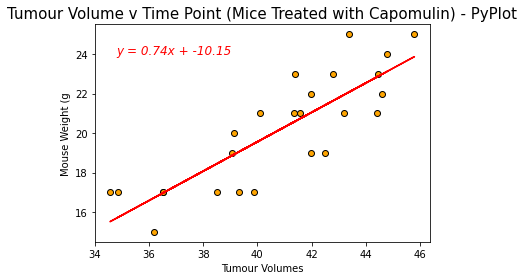

In [129]:
# Calculate the linear regression
# for mouse weight and average tumour volume for the Capomulin regimen

x_values = capomulin_data_avg["Tumour Volume (mm3)"]
y_values = capomulin_data_avg["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(34.8,24),fontsize=12, fontstyle="italic", color="red")
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.xlabel('Tumour Volumes')
plt.ylabel('Mouse Weight (g')
plt.show()

